In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
portfolio = pd.read_excel("C:\\Users\\CG14773\\OneDrive - Cerved\\codebase\\Utilities\\streamlit\\data\\input\\eurobank\\202509.xlsx")
portfolio.shape

(480, 43)

# kpis

In [42]:
portfolio['consumption'] = portfolio['ΚΥΒΙΚΑ 1'].fillna(0) + \
                                    portfolio['ΚΥΒΙΚΑ 2'].fillna(0) + \
                                    portfolio['ΚΥΒ.3'].fillna(0) + \
                                    portfolio['ΚΥΒ.4'].fillna(0) + \
                                    portfolio['ΚΥΒ.5'].fillna(0)

In [43]:
columns = ["ΛΟΓΑΡ. ΥΔΡΕΥΣΗΣ", "ΛΟΓΑΡΙΑΣΜΟΣ ΛΑΘΡΑΙΑΣ ΥΔΡΟΛΗΨΙΑΣ"]
bills = portfolio[portfolio['ΤΥΠΟΣ ΛΟΓΑΡΙΑΣΜΟΥ'].isin(columns)]
bills.shape

(208, 44)

In [44]:
bills['ΑΡ.ΠΑΡΟΧΗΣ'].nunique()

141

In [45]:
bills['consumption'].isnull().sum()

np.int64(0)

In [53]:
supply_metrics = bills.groupby('ΑΡ.ΠΑΡΟΧΗΣ').agg({
            'consumption': 'sum',
            'ΟΦΕΙΛΗ': 'sum'
        }).reset_index()

# supply_metrics = supply_metrics[supply_metrics['consumption'] > 0] # Filter out rows with zero consumption
supply_metrics['price_per_cubic_meter'] = supply_metrics['ΟΦΕΙΛΗ'] / supply_metrics['consumption']


In [54]:
supply_metrics

,ΑΡ.ΠΑΡΟΧΗΣ,consumption,ΟΦΕΙΛΗ,price_per_cubic_meter
0,67101,6.1,8.18,1.340984
1,67103,93.0,213.18,2.292258
2,74374,12.0,12.29,1.024167
3,95344,6.0,8.05,1.341667
4,110314,0.0,3.81,inf
...,...,...,...,...
136,2195056,6.2,8.31,1.340323
137,2210088,22.0,16.57,0.753182
138,2210089,8.0,9.81,1.226250
139,8301359,5.8,7.77,1.339655


In [56]:
supply_metrics.nlargest(5, 'consumption')

,ΑΡ.ΠΑΡΟΧΗΣ,consumption,ΟΦΕΙΛΗ,price_per_cubic_meter
8,154840,448.0,1320.30,2.947098
32,599205,200.0,864.58,4.322900
98,1629110,161.0,648.75,4.029503
133,2168598,122.0,236.40,1.937705
13,311588,107.0,268.74,2.511589


In [57]:
supply_metrics.nlargest(5, 'ΟΦΕΙΛΗ')

,ΑΡ.ΠΑΡΟΧΗΣ,consumption,ΟΦΕΙΛΗ,price_per_cubic_meter
108,1802547,16.7,2985.14,178.750898
8,154840,448.0,1320.30,2.947098
32,599205,200.0,864.58,4.322900
98,1629110,161.0,648.75,4.029503
13,311588,107.0,268.74,2.511589


In [59]:
supply_metrics_filtered = supply_metrics[supply_metrics['price_per_cubic_meter'] != float('inf')]
supply_metrics_filtered.nlargest(5, 'price_per_cubic_meter')

,ΑΡ.ΠΑΡΟΧΗΣ,consumption,ΟΦΕΙΛΗ,price_per_cubic_meter
108,1802547,16.7,2985.14,178.750898
32,599205,200.0,864.58,4.322900
98,1629110,161.0,648.75,4.029503
63,1294707,6.5,22.95,3.530769
8,154840,448.0,1320.30,2.947098


# scatterplot

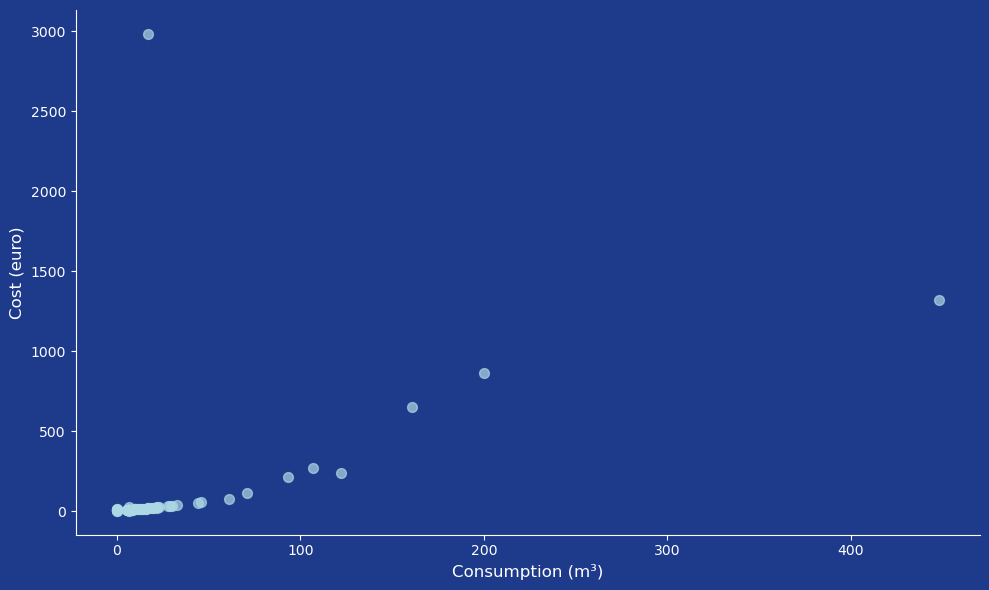

In [63]:
import mplcursors

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#1e3a8a')  # Dark blue background
ax.set_facecolor('#1e3a8a')  # Dark blue background

scatter = ax.scatter(supply_metrics['consumption'], supply_metrics['ΟΦΕΙΛΗ'], 
                    c='lightblue', alpha=0.7, s=50)

ax.set_xlabel('Consumption (m³)', color='white', fontsize=12)
ax.set_ylabel('Cost (euro)', color='white', fontsize=12)
ax.tick_params(colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Add hover functionality
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Supply ID: {supply_metrics.iloc[sel.target.index]['ΑΡ.ΠΑΡΟΧΗΣ']}"))

plt.tight_layout()
plt.show()